<a href="https://colab.research.google.com/github/LorenFiorini/Market-Analysis/blob/main/Prophet_yfinance(BTC_USD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Install yfinance

In [17]:
!pip install yfinance

# Forecasting BTC-USD exchange with Prophe. Data from Yahoo Finance

In [22]:
import yfinance as yf

# BTC - USD
btc = yf.Ticker('BTC-USD')

hist = btc.history(period="max", auto_adjust=True)

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2022-04-23,39738.722656,39935.859375,39352.203125,39486.730469,16138021249,0,0
2022-04-24,39478.375000,39845.925781,39233.539062,39469.292969,17964398167,0,0
2022-04-25,39472.605469,40491.753906,38338.378906,40458.308594,35445730570,0,0


In [29]:
import pandas as pd

df = pd.DataFrame()

df['ds'] = hist.index
df['y'] = hist['Close'].values

df.tail()

,ds,y
2775,2022-04-23,39486.730469
2776,2022-04-24,39469.292969
2777,2022-04-25,40458.308594
2778,2022-04-26,38117.460938
2779,2022-04-27,39146.082031


In [31]:
from fbprophet import Prophet

m = Prophet(daily_seasonality=False)

m.fit(df)


In [35]:
future = m.make_future_dataframe(365, freq='D')

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
3133,2023-04-16,76257.128608,67971.644771,84202.617039
3134,2023-04-17,76340.023441,67812.971552,84178.519459
3135,2023-04-18,76396.935822,67915.116641,84520.781316
3136,2023-04-19,76532.588256,68023.196917,85885.187952
3137,2023-04-20,76634.532033,67281.175469,85443.048485
3138,2023-04-21,76783.365281,68548.823645,85484.839712
3139,2023-04-22,76947.171173,68105.998438,84423.223230
3140,2023-04-23,77091.119957,68311.632517,85794.508736
3141,2023-04-24,77285.769990,68566.454055,85361.972349
3142,2023-04-25,77445.860977,69335.631788,86259.232927


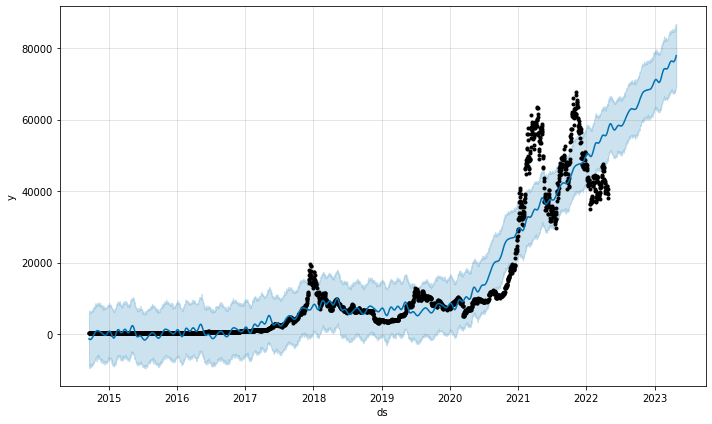

In [34]:
m.plot(forecast);

## Make it a Function

In [37]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

#### Make some Forecasts with that Function

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-05,13.800126,12.635484,14.360062,13.800126,13.800126,-0.317780,-0.317780,-0.317780,-0.075936,-0.075936,-0.075936,-0.241844,-0.241844,-0.241844,0.0,0.0,0.0,13.482345
1,2017-05-08,13.795732,12.642732,14.437971,13.795732,13.795732,-0.215577,-0.215577,-0.215577,-0.073689,-0.073689,-0.073689,-0.141887,-0.141887,-0.141887,0.0,0.0,0.0,13.580155
2,2017-05-09,13.794267,12.793619,14.571485,13.794267,13.794267,-0.179276,-0.179276,-0.179276,-0.069472,-0.069472,-0.069472,-0.109804,-0.109804,-0.109804,0.0,0.0,0.0,13.614991
3,2017-05-10,13.792802,12.705954,14.495842,13.792802,13.792802,-0.153710,-0.153710,-0.153710,-0.074762,-0.074762,-0.074762,-0.078949,-0.078949,-0.078949,0.0,0.0,0.0,13.639092
4,2017-05-11,13.791337,12.866938,14.510418,13.791337,13.791337,-0.125266,-0.125266,-0.125266,-0.075653,-0.075653,-0.075653,-0.049613,-0.049613,-0.049613,0.0,0.0,0.0,13.666071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,2022-10-20,22.717589,21.490197,24.325002,21.675989,23.867601,0.173309,0.173309,0.173309,-0.075653,-0.075653,-0.075653,0.248962,0.248962,0.248962,0.0,0.0,0.0,22.890899
1430,2022-10-21,22.724423,21.455439,24.427701,21.681928,23.884806,0.163926,0.163926,0.163926,-0.075936,-0.075936,-0.075936,0.239862,0.239862,0.239862,0.0,0.0,0.0,22.888349
1431,2022-10-22,22.731258,21.818025,24.615922,21.682586,23.901042,0.414659,0.414659,0.414659,0.184756,0.184756,0.184756,0.229903,0.229903,0.229903,0.0,0.0,0.0,23.145916
1432,2022-10-23,22.738092,21.671839,24.565936,21.675587,23.911167,0.404047,0.404047,0.404047,0.184756,0.184756,0.184756,0.219291,0.219291,0.219291,0.0,0.0,0.0,23.142139


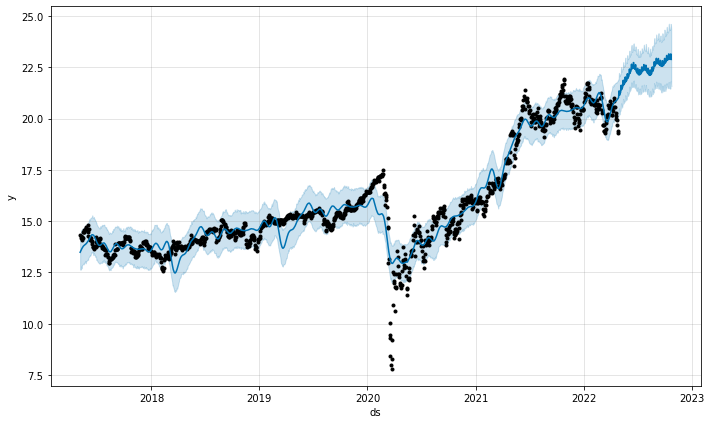

In [38]:
# kkr real estate finance trust
make_forecast('KREF', 180)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2625,2024-04-22,75.430895,42.044343,110.105726,43.017151,108.512752,1.814187,1.814187,1.814187,1.059106,1.059106,1.059106,0.755081,0.755081,0.755081,0.0,0.0,0.0,77.245082
2626,2024-04-23,75.471722,45.505475,111.574080,42.983530,108.613099,2.028192,2.028192,2.028192,1.159251,1.159251,1.159251,0.868940,0.868940,0.868940,0.0,0.0,0.0,77.499914
2627,2024-04-24,75.512549,43.685500,111.115772,42.949909,108.713446,2.097739,2.097739,2.097739,1.118610,1.118610,1.118610,0.979129,0.979129,0.979129,0.0,0.0,0.0,77.610288
2628,2024-04-25,75.553376,45.766905,110.277102,42.916287,108.813793,2.294110,2.294110,2.294110,1.211114,1.211114,1.211114,1.082997,1.082997,1.082997,0.0,0.0,0.0,77.847486
2629,2024-04-26,75.594203,44.029866,110.841406,42.888750,108.912558,2.382178,2.382178,2.382178,1.204296,1.204296,1.204296,1.177882,1.177882,1.177882,0.0,0.0,0.0,77.976380


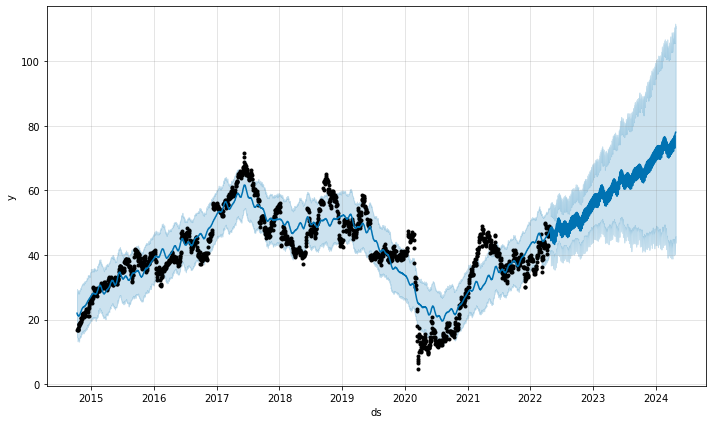

In [39]:
# dave & buster's
make_forecast('PLAY', 365 * 2).tail()

,ds,yhat,yhat_lower,yhat_upper
1299,2022-04-28,35.432940,29.161984,41.284056
1300,2022-04-29,35.504045,29.028734,41.890123
1301,2022-04-30,34.901127,28.824218,41.409875
1302,2022-05-01,34.792460,29.075386,40.822115
1303,2022-05-02,34.953698,29.068930,40.984755
...,...,...,...,...
1659,2023-04-23,5.390944,-13.390127,26.455768
1660,2023-04-24,5.578831,-14.636302,26.096954
1661,2023-04-25,5.565887,-14.054153,25.731607
1662,2023-04-26,5.450104,-13.786645,26.329892


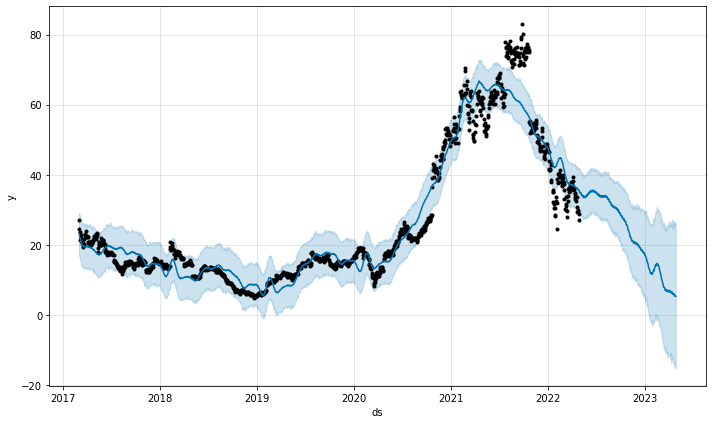

In [41]:
n = 365  # set variable for number of days to predict

# snapchat
snap_forecast = make_forecast('SNAP', n)

# only keep the future forecast, and forget most columns
snap_forecast = snap_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n)

snap_forecast